CSE 510 – Introduction to Reinforcement Learning

Instructor: Alina Vereshchaka



   # Project 1:  **Building Reinforcement Learning Environment**


---

**Author**: Shwetasree Chowdhury

**Department:** Computer Science

**UB Person Id:** 50296995




 


## **Abstract**

The goal of the project is to explore and get an experience of building reinforcement learning environments – deterministic and stochastic, following the OpenAI Gym standards.
The project is a basic and personalized attempt at re-creating the “FrozenLake” game using a grid-world. The original frozen lake text game environment details can be found at https://gym.openai.com/envs/FrozenLake-v0/. I aim to use Q-Learning to help train our agent to avoid obstacles inside the environment, while at the same time, maximize the reward it gets to reach the goal. 


## 1.	Frozen lake – A classic reinforcement learning problem

### 1.1	Problem Statement

The Frozen lake problem is a classic reinforcement learning problem which uses a grid- world implementation. A man/agent located in one position (top left corner in our case) aims to reach a goal which is located at the rightmost bottom corner of our grid, essentially to say to the other side of the lake. But the lake environment, is replete with obstacles – grids of freezing cold water. The game ends when the man/agent reaches the goal or falls into one of those holes of freezing water. In the original game, there’s a reward of 1 if agent reaches the goal, -1 and end of game if agent falls to a hole, while there are no rewards associated with the movement of the agent towards its goal. 
In this project, in order to incentivize the agent for making a progressive choice of movement (up, down, left, right) towards the goal, I have introduced rewards at each step: 

•	100 for reaching the goal

•	-100 if agent falls into a hole with the episode terminating

•	-1 if the agent stays at the same place or it moves away from the goal

•	+5, if it moves towards the goal


Additionally, the ice may sometime be slippery (stochastic) and hence, the agent/man might skid to some direction other than his stipulated/ intended direction.



![Capture234.PNG](attachment:Capture234.PNG)


### 1.2 	What is Reinforcement Learning and how does it solve this problem?

Reinforcement Learning is a specialized branch of Machine Learning which deals with how to map situations to actions—so as to maximize a numerical reward signal. The learner is not told which actions to take, but instead must discover which actions yield the most reward by trying them.  The idea behind Reinforcement Learning is that an agent will learn from the environment by interacting with it and receiving rewards for performing actions.

•	Agent receives state St from the Environment (In our case we receive the first frame of our game (state) from FrozenLake (environment)

•	Based on that state St, agent takes an action At (our agent will move right/down)

•	Environment transitions to a new state St+1 (new frame)

•	Environment gives some reward Rt to the agent (one step closer to goal: +1)

•	This RL loop outputs a sequence of state, action and reward.

•	The goal of the agent is to maximize the expected cumulative reward.


![123.png](attachment:123.png)

The Markov property and expresses that environment's next state st+1 at time t+1 only depends on the representation of the current state and action.

Markov Decision Process (MDP) describes a Reinforcement Learning task that states can be specified by Markov properties.

### 1.3	Q learning Algorithm

Q-learning is a model-free reinforcement learning algorithm. The goal of Q-learning is to learn a policy, which tells an agent what action to take under what circumstances. It does not require a model (hence the connotation "model-free") of the environment, and it can handle problems with stochastic transitions and rewards, without requiring adaptations.

![xyz.PNG](attachment:xyz.PNG)

This process is done to maximize reward for each step or episode to find the optimal solution and it runs until the episode ends after which it may start again or replayed for the next episode.
Here 𝛾 is the Discounting factor which lies in the range [0,1]. 

![capture123.png](attachment:capture123.png)

When we try to train our agent using Q learning, we use the Q learning algorithm which uses a Q table to tabulate the rewards at each step, which helps the agent choose between explorationa nd exploitation. Q(state, action) returns the expected future reward of that action at that state. 

This function can be estimated using Q-Learning, which iteratively updates Q(s,a) using the Bellman equation.

![1234.PNG](attachment:1234.PNG)

Initially we explore the environment and update the Q-Table. When the Q-Table is ready, the agent will start to exploit the environment and start taking better actions.






## 2. Implementation

### 2.1 Importing all libraries required

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import random
import time
from google.colab import widgets
from matplotlib import colors
import pandas as pd

In [5]:
output_grid = widgets.Grid(1, 1)

""


### 2.2 Creating the RL environment 

The environment we’re trying to construct is a 4*4 grid world with the following attributes:

•	It’s a deterministic/ stochastic environment as per the parameters passed.

•	The agent is positioned at (0,0)

•	The holes/obstacles are positioned at (1,1), (1,3) and (2,3)

•	The goal is positioned at (3,3)



Markov Decision Process is a 4-tuple which contains:

1. The State Set (S)

2. The Action Set (A)

3. Probability Function (P)

4. Rewards (R)



The environment is constructed by the class FrozenLake and defined containing a few functions:

1. **initialisation** -   initialises the environment parameters - namely observation space and action space.  
Observation space is the number of observable states that our  environment provides. 
Action space defines the number of actiosn that can be taken on the enviornment - namely up, down, left, right movements. 

2. **reset** - Resets the environment and returns a random initial state if the randomStart is set while initializing the environment

3. **step** - function that defines the essence of the environment. It contains the decision making unit of the environment. A step function takes in an 'action' and decides what to do next or where to go. 

    Step returns four values. These are:

    a. observation (object): an environment-specific object representing your observation of the environment. 

    b. reward (float): amount of reward achieved by the previous action.

    c. done (boolean): whether it’s time to reset the environment again.

    d. info (dict): diagnostic information useful for debugging. It can sometimes be useful for learning.

    * In step function based on the action received, we get the possible next positions from the transition table we created while initializing the environment. 
    * If our environment is deterministic, we only get one possible next state from the transition table with associated probability of 1.0 but if our environment is stochastic we receive multiple states that the agent can go to due to slipperiness with associated probabilities of going to each state (Right and Down have been given higher probability).

    * We then iterate over these possible states and pick one state randomly. The state which has the higher probability has more chance of getting selected and hence it is more probable that the agent will move in that direction.

    * Based on the this next state we calculate the rewards associated with moving to this next state or position based on the values defined above

4. **render** - Renders one frame of the environment

5.  **getCurrentState**  - returns the current position of the agent.

6. **getState** - returns state of the requested agent

7. **isOver** - function to check if episode is over - whether agent ahs reached goal or fallen into a hole.

8. **increment** - takes an action and naviagtes to the next state. Returns new state position.

9. **createTransiitonTable** - creates a probability transition matrix 4 x 16 grids in count to store 
 probabilities associated with each movement.
 
 There are two types of actions that are taken to determine the next states based on whether the environment is deterministic or stochastic.
 
 If the environment is deterministic then for each action there is only one possible next state which has a probability of 1.0 associated with it.If the environment is stochastic, then for each possible action encountered it is possible that the agent can move in other directions as well if the ice is slippery. Hence, in our case we assigned probability of 0.7 to the movements RIGHT and DOWN since they move the agent closer to the goal, and probabilty 0.2 to other directions since moving in those directions takes the agent further from the goal. For every state and action, we store all the possible next states if the agent might have gone in a different direction.





In [0]:
class FrozenLake(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self,deterministic=True,maxsteps=16,randomStart=False):   #Init function
        self.observation_space = spaces.Discrete(16) 
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = maxsteps
        self.deterministic = deterministic
        self.randomstart = randomStart
        self.reset()
        self.Ptable = self.createTransitionTable()
        
    def reset(self):                                                        #Reset function
        self.timestep = 0
        self.state = np.zeros((4,4)) 
        self.goal_pos = [3, 3]     #Assigning fixed positions for goal and holes
        self.hole_pos1 = [1, 1]
        self.hole_pos2 = [1, 3]
        self.hole_pos3 = [2, 3]
        self.done = False
        
        self.state[tuple(self.goal_pos)] = 0.5      #assigning values in the grid for visual representation
        self.state[tuple(self.hole_pos1)] = 0.2
        self.state[tuple(self.hole_pos2)] = 0.2
        self.state[tuple(self.hole_pos3)] = 0.2
        
        agent_pos = [0, 0] 
        
        if self.randomstart == False:
          agent_pos = [0, 0]   # Assigning agent position at top left corner, in case of a deterministic environment
        else:
          while True:          # Assigning agent position at any random position inside the grid, in case of a stochastic environment
            x = np.random.randint(0, 3)
            y = np.random.randint(0, 3)
            pos = [x, y]
            if np.array_equal(pos,self.hole_pos1) or np.array_equal(pos,self.hole_pos2) or np.array_equal(pos,self.hole_pos3):
              continue
            else:
              agent_pos = [x, y]
              break    
         
        self.agent_pos = agent_pos
        self.state[tuple(self.agent_pos)] = 1
        observation = np.argmax(self.state.flatten())
        return observation
      
    
    def step(self, action):                               #step function                                     
        assert self.action_space.contains(action)
        self.state[tuple(self.agent_pos)] = 0.0           
        initPos = self.agent_pos
        currstate = self.getcurrentstate(self.agent_pos)
        PossibleStates = self.Ptable[currstate][action]
        probs = np.array([x[0] for x in PossibleStates])
        probs = probs/sum(probs)
        nextStateind = np.random.choice(len(probs), p=probs) 
        self.agent_pos = PossibleStates[nextStateind][1]  
        
        prevdist = np.square(self.goal_pos[1]-initPos[1])+np.square(self.goal_pos[0]-initPos[0])
        newdist = np.square(self.goal_pos[1]-self.agent_pos[1])+np.square(self.goal_pos[0]-self.agent_pos[0])
  
        reward = -1   # for every movement reward deducted by 1
        done = False
        if np.array_equal(self.agent_pos,self.goal_pos):
          reward = 100  # if agent pos and goal pos is same, reward 100 and end episode
          done = True
        elif np.array_equal(self.agent_pos,self.hole_pos1) or np.array_equal(self.agent_pos,self.hole_pos2) or np.array_equal(self.agent_pos,self.hole_pos3) :
          reward = -100   # if agent pos and hole pos is same, deduct 100 and end episode
          done = True 
        elif newdist<prevdist:  # if agent moves closer to goal reward +5
          reward = 5
        
        
        self.state[tuple(self.agent_pos)] = 1    
        
        self.timestep += 1
        if self.timestep >= self.max_timesteps or done:
          self.done = True
        else:
          self.done = False
        info = PossibleStates
        observation = np.argmax(self.state.flatten())
        return observation, reward, self.done, info
        
    def render(self):                                        #Render Function
        plt.imshow(self.state)
        
    def getcurrentstate(self,currPos):                       #GetCurrentState function returns position
        return currPos[0]*self.state.shape[1] + currPos[1]
      
    def getState(self):                                        #Returns environment state
      return self.state
      
    def isOver(self,pos):                                     # Isover determines if agent has reached goal/ hole 
      if np.array_equal(pos,self.goal_pos) or np.array_equal(pos,self.hole_pos1) or np.array_equal(pos,self.hole_pos2) or np.array_equal(pos,self.hole_pos3):
        return True
      
    def increment(self,action,pos):                          # increment function to return future pos of next state
      fpos = pos 
      if action == 0 and pos[0] < 3:      
           fpos[0] += 1                     # 0- down movement; agent position is incremented by 1 in the downward direction
      if action == 1 and pos[0] > 0:
         fpos[0] -= 1                       # 1- up movement; agent position is decremented by 1 in the upward direction
      if action == 2 and pos[1] < 3:
         fpos[1] += 1                       # 0- right movement; agent position is incremented by 1 in the right direction
      if action == 3 and pos[1] > 0:
         fpos[1] -= 1                       # 0- left movement; agent position is decremented by 1 in the left direction
      return  fpos
      
    def createTransitionTable(self):                                      #Probability Transiition matrix containing the probabilities associated with each step                                       
      Ptable = {s : {a : [] for a in range(4)} for s in range(16)}
      for r in range(4):
          for c in range(4):
              st = self.getcurrentstate([r,c])
              for action in range(4):
                  temp = Ptable[st][action]
                  if self.isOver([r,c]):            # checks if agent is at hole/goal position
                      temp.append((1.0, [r,c]))
                  else:
                      if self.deterministic:           # if the environment is deterministic        
                          fpos = self.increment(action,[r,c])
                          temp.append((1.0, fpos))
                      else:                           # if environment is stochastic
                          pr = 1
                          for acs in [(action-1)%4, action, (action+1)%4]: 
                          #for acs in [0,1,2,3]:
                              fpos = self.increment(acs,[r,c])
                              if acs == 2 or acs == 0:        # For down and right movements, we are assigning  a probability of 0.7
                                temp.append((0.7, fpos))
                              else:
                                temp.append((0.2, fpos))      # for up and left movements, we are assigning a probability of 0.2 
      return Ptable
      
    

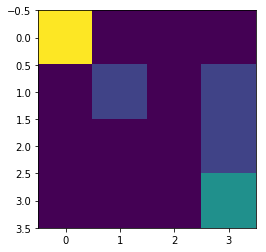

In [7]:
# Testing to see if our environment looks and behaves as expected
env = FrozenLake(deterministic=True) # Here we want our environment to be deterministic
obs = env.reset() # It is important to reset the environment to its initial state before we call on an episode
env.render() # rendering the environment
# 0 - down
# 1 - up
# 2 - right
# 3 - left



## DETERMINISTIC IMPLEMENTATION

Reward: 5


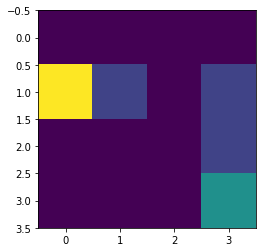

In [8]:
#Testing to see if our agent can move down as instructed
action = 0
observation, reward, done, info = env.step(action) # Invoking the step function with action=0 down movement
env.render()
print('Reward:', reward) # Rewarding the agent 5 points for moving closer to goal

### 2.3 Creating/Training the Q- Learning agent




Central to Q learning is the concept of exploitation and exploration.
Exploitation make the best decision given current
information while exploration is gathering more information.
The best long–term strategy may sometimes involve short–term
sacrifices. While the overall aim of the agent would be to gather enough information to make the best overall
decisions.

The reward calculation at each step is tabulated and considered for calculation for next step with the help of a Q table which is a lookup table where we calculate the maximum expected future rewards for action at each state. In the Q-Table, the columns are the actions and the rows are the states.
The values in the Q table are calculated by the Q- Learning algorithm explained in section 1.3.

The RL model here is loosely based on an epsilon-decreasing strategy. With this strategy we explore with probability epsilon, and exploit with probability 1 — epsilon. Epsilon decreases over time.

In [0]:
class Q_Agent:
  def __init__(self, env, learning_rate, gamma):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.q_table = np.zeros((self.observation_space.n, self.action_space.n))   #define q table
  
  def step(self, state, tradeoff, epsilon):
    # Exploit (the biggest Q value for this state)
    if tradeoff > epsilon:
      action = np.argmax(self.q_table[state,:])
    # Else doing a random choice --> exploration
    else:
      action = self.action_space.sample()
    return action
  
  def update(self, state, action, new_state, reward):
    self.q_table[state, action] = self.q_table[state, action] + ( self.learning_rate * (reward + self.gamma * np.max(self.q_table[new_state, :]) - self.q_table[state, action]) )
    
  def getQtable(self):
    return self.q_table

Defining the exploration parameters

In [0]:
q_agent = Q_Agent(env, learning_rate=0.95, gamma=0.96)

total_episodes = 5000 # training for 5000 episodes

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005            # Exponential decay rate for exploration prob

In [11]:
q_agent.q_table.shape   # dimensions of the q_table

(16, 4)

using collab widget to print grids for every 500 episode. For every episode that does not meet it's goal, tradeoffs, epsilon are recalibrated. 

From the grids below, it is evident that the agent has converged with the goal between episodes 500 and 1000, and all teh episodes therafter.

Starting state


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

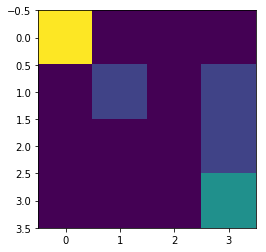

<IPython.core.display.Javascript object>

Episode No: 1


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

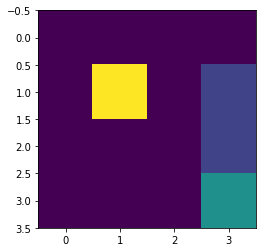

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  1.  0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  0.5]]
Episode No: 501


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

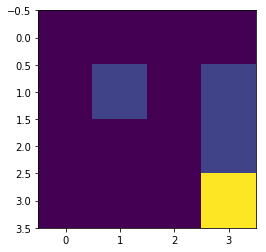

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 1001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

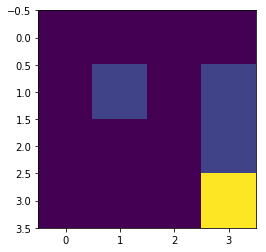

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 1501


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

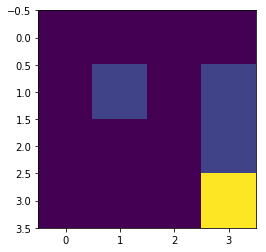

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 2001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

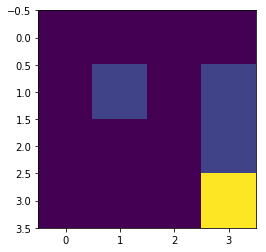

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 2501


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

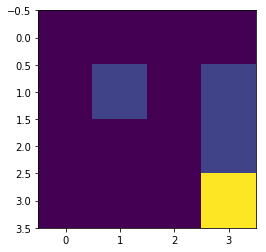

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 3001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

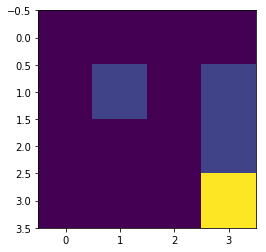

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 3501


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

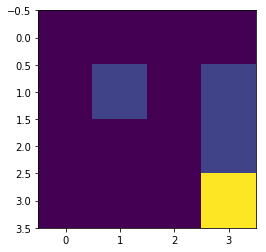

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 4001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

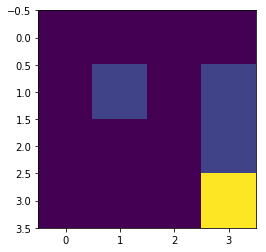

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 4501


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

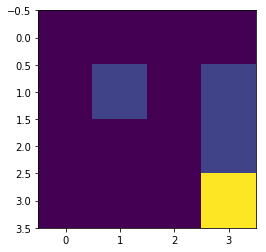

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]


In [12]:

print("Starting state")
rewards = []
epsilons = []
state = env.reset()
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  output_grid.clear_cell()
  env.render()
time.sleep(0.25)

for episode in range(total_episodes):
  state = env.reset()
  total_rewards = 0
  done = False
  
  if episode % 500 == 0:
    print ('Episode No:', episode+1)
    
  while not done:
    tradeoff = random.uniform(0, 1)
    action = q_agent.step(state, tradeoff, epsilon)
    new_state, reward, done, info = q_agent.env.step(action)
    q_agent.update(state, action, new_state, reward)    
    total_rewards += reward   
    state = new_state
  if episode % 500 == 0:
    output_grid = widgets.Grid(1, 1)
    with output_grid.output_to(0, 0):
      output_grid.clear_cell()
      env.render()
    print(q_agent.env.getState())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
  epsilons.append(epsilon)
  rewards.append(total_rewards)

**Rewards Graph**

Graph shows the rewards obtained for each episode.The graph below shows the maximum cumulative reward, which is pretty high for all 10000 episodes as the agent trains itself within the first 1000 episodes

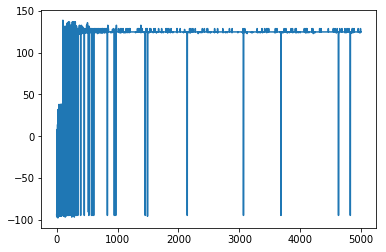

In [13]:
plt.plot(rewards)

**Graph for Rolling mean of rewards**

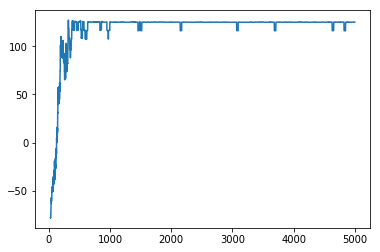

In [14]:
df = pd.DataFrame(rewards, columns=['r'])
mean_roll = df['r'].rolling(window=25).mean()
plt.plot(mean_roll)

**The Epsilon graph** initially has its value higher since we want to explore the environment and hence we take random actions but gradually the trend decreases as we start exploiting the information we have obtained in the q table.

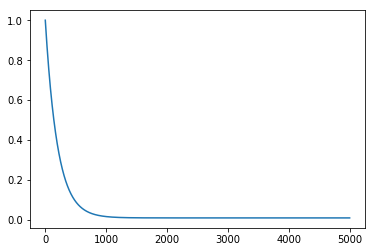

In [15]:
plt.plot(epsilons)

### The Q table 

In [16]:
q_df = pd.DataFrame(q_agent.q_table, columns=['right', 'left', 'up' ,'down'])
q_df

,right,left,up,down
0,104.615683,99.431055,100.453813,99.431055
1,-100.000000,93.584361,94.262337,99.431055
2,50.645252,79.771318,78.991952,93.665561
3,-99.750000,-0.997500,-0.950000,80.436353
4,103.766336,99.431055,-100.000000,98.615683
5,0.000000,0.000000,0.000000,0.000000
6,101.831565,33.693462,-99.750000,-99.750000
7,0.000000,0.000000,0.000000,0.000000
8,102.881600,98.615683,102.881600,97.766336
9,101.960000,-100.000000,101.959657,96.559078


Animation showing 2 episodes among all 10000 episodes that exhibit maximum learning curve

EPISODE: 1


""


Probabilities and Possible positions for step 1: [(1.0, [1, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 2: [(1.0, [2, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 3: [(1.0, [3, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 4: [(1.0, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 5: [(1.0, [3, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 6: [(1.0, [3, 3])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No of steps taken: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

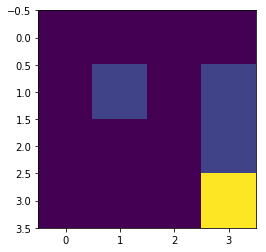

<IPython.core.display.Javascript object>

EPISODE: 2


""


Probabilities and Possible positions for step 1: [(1.0, [1, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 2: [(1.0, [2, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 3: [(1.0, [3, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 4: [(1.0, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 5: [(1.0, [3, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 6: [(1.0, [3, 3])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No of steps taken: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

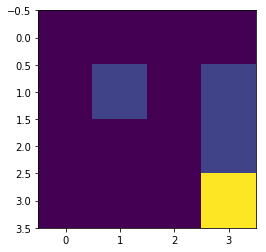

<IPython.core.display.Javascript object>

In [17]:
for episode in range(2):
  state = env.reset()
  total_reward = 0
  done = False
  print("EPISODE:",episode+1)
  nsteps = 0
  output_grid = widgets.Grid(1, 1)
  while not done:
    action = q_agent.step(state, tradeoff, epsilon)
    new_state, reward, done, info = q_agent.env.step(action)
    
    state = new_state
    nsteps+=1
    print("Probabilities and Possible positions for step "+str(nsteps)+":",info)
    with output_grid.output_to(0, 0):
      output_grid.clear_cell()
      env.render()
    time.sleep(1)
  print("No of steps taken:",nsteps)
  
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

## **STOCHASTIC IMPLEMENTATION**

The Stochastic implementation entails that the lake may be slippery in nature, wherein, the agent may not be able to move ahead in the intended direction and move in a random fashion. 

In order to go ahead with this implementation, set the deterministic flag to false.

randomStart flag is set to true, which implies random position assignment for agent has been switched on. For this stochastic model, it can be set to either true/false

maxsteps has been set to 20, as the environment is slippery and the agent can be expected to make a lot of confused movements. 



Initial State: 6


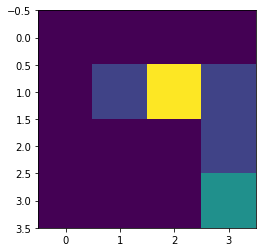

In [18]:
env = FrozenLake(deterministic=False,maxsteps=20,randomStart=True)
obs = env.reset()
print("Initial State:",obs)
env.render()
# 0 - down
# 1 - up
# 2 - right
# 3 - left


The Q learning agents have been defined in the same manner for both the deterministic and stochastic approaches

In [0]:
class Q_Agent:
  def __init__(self, env, learning_rate, gamma):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.q_table = np.zeros((self.observation_space.n, self.action_space.n))
  
  def step(self, state, tradeoff, epsilon):
    # Exploit (the biggest Q value for this state)
    if tradeoff > epsilon:
      ac = np.argmax(self.q_table[state,:])
    # Else doing a random choice - exploration
    else:
      ac = self.action_space.sample()
    return ac
  
  def update(self, state, action, new_state, reward):   #update q table 
    self.q_table[state, action] = self.q_table[state, action] + ( self.learning_rate * (reward + self.gamma * np.max(self.q_table[new_state, :]) - self.q_table[state, action]) )
    
  def getQtable(self):
    return self.q_table

Exploration parameters are defined.

In [0]:
q_agent = Q_Agent(env, learning_rate=0.95, gamma=0.96)

total_episodes = 10000

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005            # Exponential decay rate for exploration prob

We can see that in some episodes the agent has been able to reach the goal while in others, it has not. This can be attributed to the fact that to some extent, the distribution of probabilities in its movement have influenced its behaviour. (We used 0.7 as a probability for directions we thought the agent would find more favourable to reach the goal).

However, it being a stochastic model, the chance of showing untrained behaviour is quite large as we are randomising the agent's position. 

[ Agent shows better behavior with a fixed agent psoition]

Episode No: 1


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

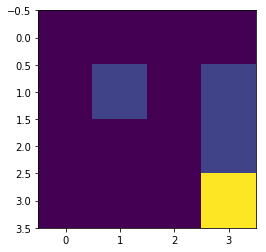

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 1001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

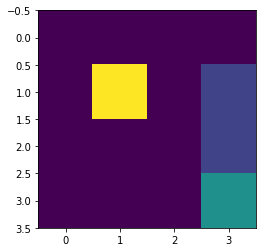

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  1.  0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  0.5]]
Episode No: 2001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

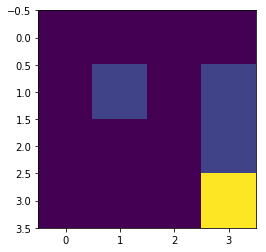

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 3001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

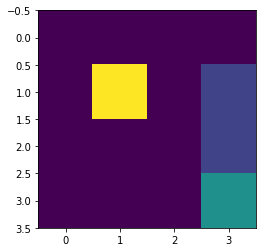

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  1.  0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  0.5]]
Episode No: 4001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

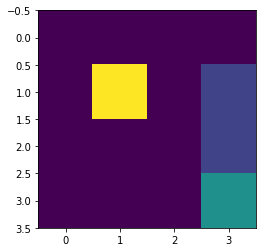

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  1.  0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  0.5]]
Episode No: 5001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

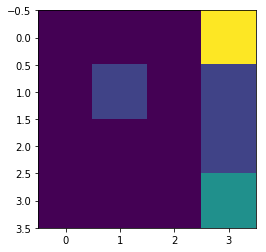

<IPython.core.display.Javascript object>

[[0.  0.  0.  1. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  0.5]]
Episode No: 6001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

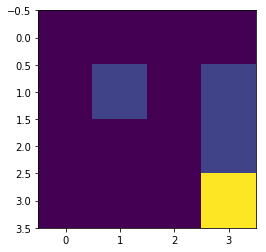

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 7001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

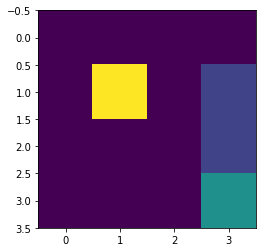

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  1.  0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  0.5]]
Episode No: 8001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

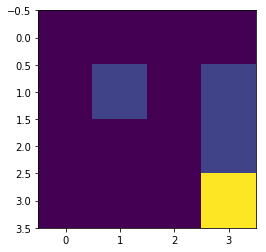

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 9001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

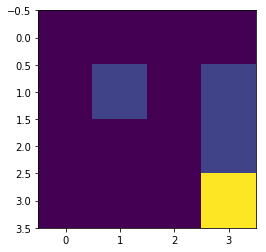

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]


In [21]:

#print("Starting state")
rewards = []
epsilons = []
state = env.reset()

time.sleep(0.25)

for episode in range(total_episodes):
  state = env.reset()
  total_rewards = 0
  done = False
  
  if episode % 1000 == 0:
    print ('Episode No:', episode+1)
    
  while not done:
    tradeoff = random.uniform(0, 1)
    action = q_agent.step(state, tradeoff, epsilon)
    #print(action)
    new_state, reward, done, info = q_agent.env.step(action)
    #print("Probabilities and Possible positions:",info)
    #reward -= 1
    
    #similar to stochastic gradient descent
    q_agent.update(state, action, new_state, reward)
    
    total_rewards += reward
    
    state = new_state
    

  if episode % 1000 == 0:
    output_grid = widgets.Grid(1, 1)
    with output_grid.output_to(0, 0):
      output_grid.clear_cell()
      env.render()
    print(q_agent.env.getState())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
  epsilons.append(epsilon)
  rewards.append(total_rewards)

**Rewards Graph**
Shows a little more eccentricity in its pattern as compared to deterministic graph. 

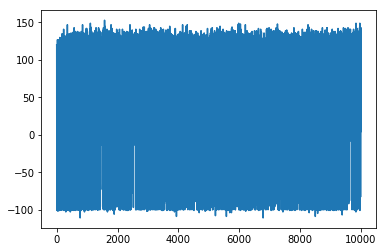

In [22]:
plt.plot(rewards)

**Rolling mean of all rewards**

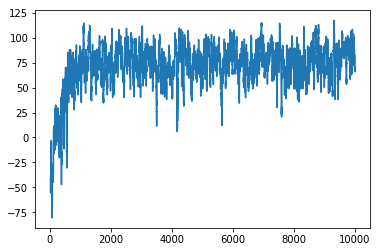

In [23]:
df = pd.DataFrame(rewards, columns=['r'])
rolling_mean = df['r'].rolling(window=25).mean()
plt.plot(rolling_mean)

**Epsilon graph** shows same trend as general Q learning algorithm is supposed to be exhibiting

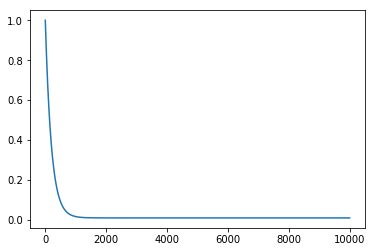

In [24]:
plt.plot(epsilons)

**THE Q TABLE** for Stochastic approach

In [25]:
q_df = pd.DataFrame(q_agent.q_table, columns=['right', 'left', 'up' ,'down'])
q_df

,right,left,up,down
0,91.579909,52.017559,38.392403,47.509269
1,-99.999998,-99.664146,94.692975,-93.412269
2,-73.478352,-40.405132,70.468877,-76.026460
3,-94.208565,-94.678656,24.719942,-94.253251
4,101.852947,-99.524202,-99.998931,-99.998842
5,0.000000,0.000000,0.000000,0.000000
6,32.678959,-99.999963,-99.999965,-99.996648
7,0.000000,0.000000,0.000000,0.000000
8,81.973163,83.353750,98.343156,-19.465597
9,-90.861171,80.856485,38.319523,86.948633


Listing out the possible positions for the agent at each episode with highest learning curve. 


EPISODE: 1


""


Probabilities and Possible positions for step 1: [(0.2, [1, 0]), (0.7, [2, 0]), (0.2, [0, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 2: [(0.2, [1, 0]), (0.7, [2, 0]), (0.2, [0, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 3: [(0.2, [1, 0]), (0.7, [2, 0]), (0.2, [0, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 4: [(0.2, [0, 0]), (0.7, [1, 0]), (0.2, [0, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 5: [(0.2, [1, 0]), (0.7, [2, 0]), (0.2, [0, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 6: [(0.2, [1, 0]), (0.7, [2, 0]), (0.2, [0, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 7: [(0.2, [1, 0]), (0.7, [2, 1]), (0.2, [2, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 8: [(0.7, [2, 2]), (0.2, [2, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 9: [(0.7, [3, 1]), (0.2, [2, 1]), (0.7, [3, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 10: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 11: [(0.7, [3, 1]), (0.2, [2, 1]), (0.7, [3, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 12: [(0.7, [3, 1]), (0.2, [2, 1]), (0.7, [3, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 13: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No of steps taken: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

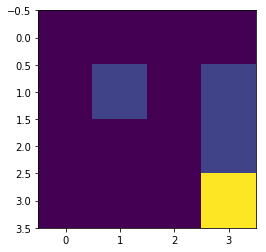

<IPython.core.display.Javascript object>

EPISODE: 2


""


Probabilities and Possible positions for step 1: [(0.2, [2, 1]), (0.7, [3, 2]), (0.2, [1, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 2: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No of steps taken: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

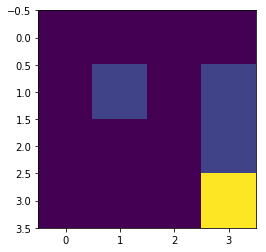

<IPython.core.display.Javascript object>

EPISODE: 3


""


Probabilities and Possible positions for step 1: [(0.2, [1, 0]), (0.7, [2, 0]), (0.2, [0, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 2: [(0.2, [1, 0]), (0.7, [2, 1]), (0.2, [2, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 3: [(0.7, [2, 2]), (0.2, [2, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 4: [(0.2, [2, 1]), (0.7, [3, 2]), (0.2, [1, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 5: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 6: [(0.2, [2, 1]), (0.7, [3, 2]), (0.2, [1, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 7: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No of steps taken: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

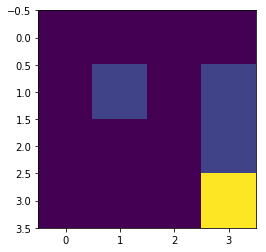

<IPython.core.display.Javascript object>

In [26]:
for episode in range(3):
  state = env.reset()
  total_reward = 0
  done = False
  print("EPISODE:",episode+1)
  nsteps = 0
  output_grid = widgets.Grid(1, 1)
  while not done:
    action = q_agent.step(state, tradeoff, epsilon)
    new_state, reward, done, info = q_agent.env.step(action)
    state = new_state
    nsteps+=1
    print("Probabilities and Possible positions for step "+str(nsteps)+":",info)
    with output_grid.output_to(0, 0):
      output_grid.clear_cell()
      env.render()
    time.sleep(1)
  print("No of steps taken:",nsteps)
  
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

## Conclusion

1.We were able to train our agent in deterministic model faster because of lack of uncertainity. In the case of stochastic approach, agent takes more number of steps and trains slower. 

2.Uncertainity in the stochastic environment has been introduced by assigning probabilities to different movements associated with each next step and randomising the agent start position.

3.Q learning has helped us achieve the same training for both environments in a exploration v/s exploitation approach, by storing cumulative rewards in the Q table to help make agent more decisive. 

## Acknowledgements

Hearty thanks to Alina and the students who had volunteered to share their knowledge about Reinforcement Learning.

## References

1. https://www.freecodecamp.org/news/an-introduction-to-q-learning-reinforcement-learning-14ac0b4493cc/
2. https://medium.com/@dennybritz/exploration-vs-exploitation-f46af4cf62fe
3. https://en.wikipedia.org/wiki/Q-learning
4. https://learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
5. https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/FrozenLake/Q%20Learning%20with%20FrozenLake.ipynb
6. https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py
7. https://www.deeplearningwizard.com/deep_learning/deep_reinforcement_learning_pytorch/dynamic_programming_frozenlake/
8. https://rlgraph.readthedocs.io/en/latest/_modules/rlgraph/environments/grid_world.html#GridWorld.step